In [16]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

In [7]:
data = pd.read_csv('chocolate_data.csv')
data.head()


,chocolate name,quality,price
0,1,10,450
1,2,9,500
2,3,8,600
3,4,7,800
4,5,6,1100


In [8]:
data.columns

Index(['chocolate name', 'quality ', 'price'], dtype='object')

## Problem 1: Polynomial Regression 
---
You want to buy huge amount of chocolates to build a chocolate house, every room in this chocolate house should be made of different types of high quality chocolates. There is only one place to buy this amount of chocolate, the "Chocolate City" of 1000 different factories and famous for its cheating prices. Chocolate Merchants Association has provided a price sheet `chocolate_data.csv` to beat the deception for 10 types of quality, the prices are per kg, but there are quality types in the market that are not mentioned in the sheet. Build a **`regression model`** that predicts the price per kilogram, and says if you want 1000kg with a quality type called "3.5" what is the price?

In [10]:
def predict_chocolate_price(quality_type):
    # Load the data from the CSV file
    data = pd.read_csv('chocolate_data.csv')

    # Extract the quality and price columns from the data
    quality = data['quality '].values.reshape(-1, 1)
    price = data['price'].values

    # Create polynomial features
    poly_features = PolynomialFeatures(degree=3)
    quality_poly = poly_features.fit_transform(quality)

    # Train the regression model
    regression_model = LinearRegression()
    regression_model.fit(quality_poly, price)

    # Predict the price for a given quality
    quality_new = [[quality_type]]
    quality_new_poly = poly_features.transform(quality_new)
    predicted_price = regression_model.predict(quality_new_poly)

    return predicted_price[0]

# Example usage
predicted_price = predict_chocolate_price(3.5)
print("Predicted price per kilogram for quality type 3.5: $", predicted_price)


Predicted price per kilogram for quality type 3.5: $ 2409.15355477903


## Problem 2: SVR
---
Build **`SVR model`** on the chocolate dataset `chocolate_data.csv` and provide the output graph showing the predictions of prices vs quality levels.

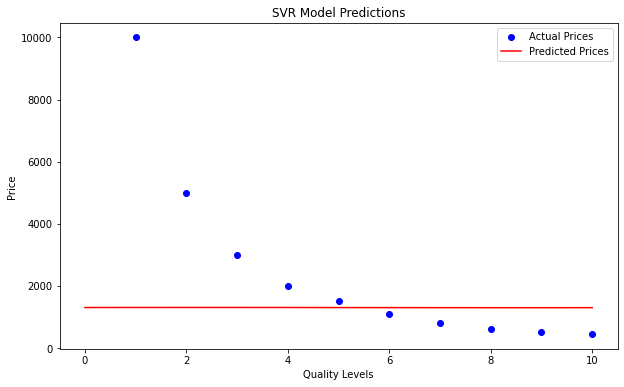

In [15]:
#Write your code
def visualize_svr_predictions():
    # Load the data from the CSV file
    data = pd.read_csv('chocolate_data.csv')

    # Extract the quality and price columns from the data
    quality = data['quality '].values.reshape(-1, 1)
    price = data['price'].values

    # Scale the features
    scaler = StandardScaler()
    quality_scaled = scaler.fit_transform(quality)

    # Create and train the SVR model
    svr_model = SVR(kernel='rbf')
    svr_model.fit(quality_scaled, price)

    # Generate predictions for quality levels
    quality_levels = np.linspace(0, 10, 100).reshape(-1, 1)
    quality_levels_scaled = scaler.transform(quality_levels)
    predicted_prices = svr_model.predict(quality_levels_scaled)

    # Plot the predictions
    plt.figure(figsize=(10, 6))
    plt.scatter(quality, price, color='blue', label='Actual Prices')
    plt.plot(quality_levels, predicted_prices, color='red', label='Predicted Prices')
    plt.title('SVR Model Predictions')
    plt.xlabel('Quality Levels')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

# Example usage
visualize_svr_predictions()


## Problem 3:  Logistic Regression
---

- Mention 2 types of regularization used to overcome the overfitting problem and what is the difference between them.

- Using the data below in X,y. Build a **`logistic model`** to predict the output and evaluate the model with a confusion matrix.


Two types of regularization commonly used to overcome the overfitting problem in logistic regression are:

- L1 Regularization (Lasso Regularization):
  - Penalty term proportional to the absolute values of the coefficients.
  - Encourages the model to reduce the coefficients of less important features, driving them towards zero.
  - Performs feature selection by effectively eliminating some features from the model.
  - Produces sparse models with some coefficients exactly equal to zero.


- L2 Regularization (Ridge Regularization):
  - Penalty term proportional to the squared values of the coefficients.
  - Encourages the model to reduce the magnitudes of all coefficients.
  - Shrinks the coefficients towards zero without eliminating them completely.
  - Keeps all features in the model but reduces their impact on the final predictions.

The main difference between L1 and L2 regularization is that L1 regularization can result in sparse models with some coefficients being exactly zero, effectively performing feature selection. On the other hand, L2 regularization usually reduces the magnitude of all coefficients without eliminating them completely, maintaining all the features in the model.

In [18]:
#Write your code
def build_logistic_regression(X, y):
    # Build logistic regression model
    logistic_model = LogisticRegression()
    logistic_model.fit(X, y)

    # Predict the output
    y_pred = logistic_model.predict(X)

    # Calculate confusion matrix
    cm = confusion_matrix(y, y_pred)
    return cm

X = np.arange(15).reshape(-1, 1)
y = np.array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1])

cm = build_logistic_regression(X, y)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[8 0]
 [0 7]]


# Good Luck 🤗 🤗 🤗